# Data preperation

In [2]:
library(lubridate)  #work with dates
library(xts)
library(forecast)
lct <- Sys.getlocale("LC_TIME"); Sys.setlocale("LC_TIME", "C") #needed for as.POSIXct

[1] "C"

In [3]:
data <- read.csv('bicup2006.csv',sep=',')
head(data)
dim(data)

DATE,TIME,DEMAND
1-Mar-05,6:30,1
1-Mar-05,6:45,2
1-Mar-05,7:00,4
1-Mar-05,7:15,0
1-Mar-05,7:30,10
1-Mar-05,7:45,13


[1] 1512    3

In [4]:
daytype<-rep("weekday",1512)
daytype[253:378]<-"weekend"
daytype[694:819]<-"weekend"
daytype[1135:1260]<-"weekend"
dtype<-rep(1,1512)
dtype[which(daytype=="weekend")]<-3


myseason<-rep(seq(1,63),24)

In [5]:
date.and.time<-paste(data$DATE,data$TIME) #combine date and time in one column
posix.date<-as.POSIXct(date.and.time,format="%d-%b-%y %H:%M")
#create new dataframe with columns posix.date and demand
newdata<-data.frame(posix.date,data$DEMAND,daytype,myseason,dtype)
names(newdata)<-c('date.and.time','demand','daytype','myseason','dtype')
head(newdata)
dim(newdata)

date.and.time,demand,daytype,myseason,dtype
2005-03-01 06:30:00,1,weekday,1,1
2005-03-01 06:45:00,2,weekday,2,1
2005-03-01 07:00:00,4,weekday,3,1
2005-03-01 07:15:00,0,weekday,4,1
2005-03-01 07:30:00,10,weekday,5,1
2005-03-01 07:45:00,13,weekday,6,1


[1] 1512    5

In [6]:
#indexes for first two weeks
training.set<-newdata[1:(14*63),]
#indexes for last week
validation.set<-newdata[((14*63)+1):(21*63),]
#indexes for last 3 days
future.set<-newdata[((21*63)+1):dim(newdata)[1],]

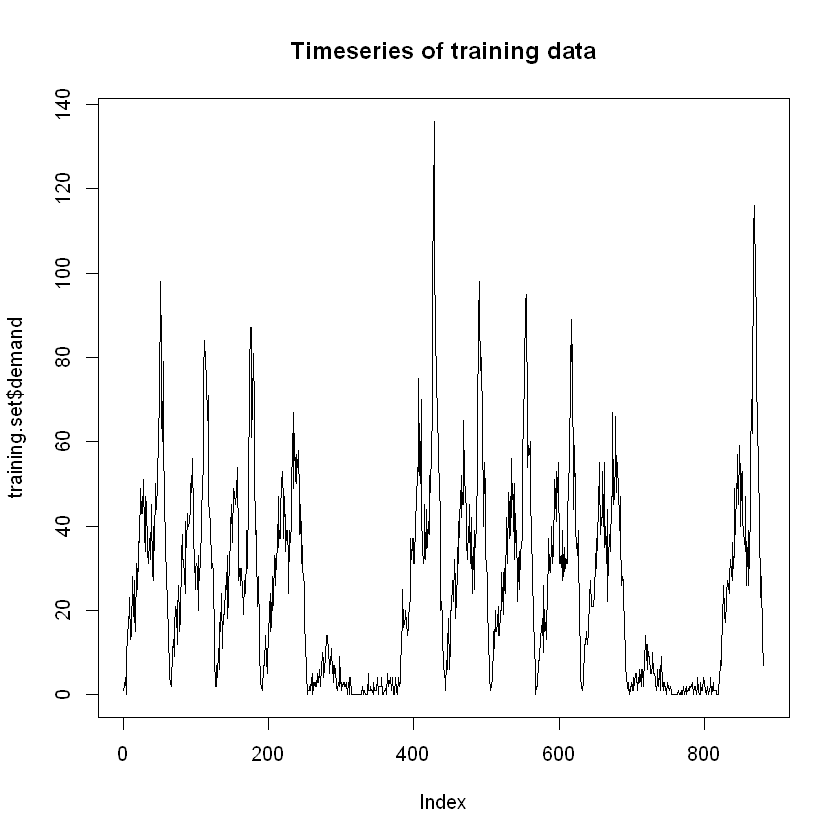

In [7]:
plot(training.set$demand,type='l',main="Timeseries of training data")

In [8]:
newdata.xts = xts(coredata(newdata$demand), order.by=as.POSIXct(newdata$date.and.time))
attr(newdata.xts,"frequency")<-63
periodicity(newdata.xts)
total_timeseries<-as.ts(newdata.xts)

15 minute periodicity from 2005-03-01 06:30:00 to 2005-03-24 22:00:00 

# LM with daytype plus season

In [9]:
seasonal_data<-data.frame(newdata,seasonaldummy(total_timeseries))

In [10]:
my.xts = xts(coredata(training.set$demand), order.by=as.POSIXct(training.set$date.and.time))
attr(my.xts,"frequency")<-63
periodicity(my.xts)
timeseries<-as.ts(my.xts)

15 minute periodicity from 2005-03-01 06:30:00 to 2005-03-14 22:00:00 

In [351]:
trainingdaytype<-dtype[1:(14*63)]
model<-tslm(timeseries ~ trainingdaytype + + seasonal_data[1:882, 6 ]+ seasonal_data[1:882, 7 ]+ seasonal_data[1:882, 8 ]+ seasonal_data[1:882, 9 ]
+ seasonal_data[1:882, 10 ]+ seasonal_data[1:882, 11 ]+ seasonal_data[1:882, 12 ]+ seasonal_data[1:882, 13 ]
+ seasonal_data[1:882, 14 ]+ seasonal_data[1:882, 15 ]+ seasonal_data[1:882, 16 ]+ seasonal_data[1:882, 17 ]
+ seasonal_data[1:882, 18 ]+ seasonal_data[1:882, 19 ]+ seasonal_data[1:882, 20 ]+ seasonal_data[1:882, 21 ]
+ seasonal_data[1:882, 22 ]+ seasonal_data[1:882, 23 ]+ seasonal_data[1:882, 24 ]+ seasonal_data[1:882, 25 ]
+ seasonal_data[1:882, 26 ]+ seasonal_data[1:882, 27 ]+ seasonal_data[1:882, 28 ]+ seasonal_data[1:882, 29 ]
+ seasonal_data[1:882, 30 ]+ seasonal_data[1:882, 31 ]+ seasonal_data[1:882, 32 ]+ seasonal_data[1:882, 33 ]
+ seasonal_data[1:882, 34 ]+ seasonal_data[1:882, 35 ]+ seasonal_data[1:882, 36 ]+ seasonal_data[1:882, 37 ]
+ seasonal_data[1:882, 38 ]+ seasonal_data[1:882, 39 ]+ seasonal_data[1:882, 40 ]+ seasonal_data[1:882, 41 ]
+ seasonal_data[1:882, 42 ]+ seasonal_data[1:882, 43 ]+ seasonal_data[1:882, 44 ]+ seasonal_data[1:882, 45 ]
+ seasonal_data[1:882, 46 ]+ seasonal_data[1:882, 47 ]+ seasonal_data[1:882, 48 ]+ seasonal_data[1:882, 49 ]
+ seasonal_data[1:882, 50 ]+ seasonal_data[1:882, 51 ]+ seasonal_data[1:882, 52 ]+ seasonal_data[1:882, 53 ]
+ seasonal_data[1:882, 54 ]+ seasonal_data[1:882, 55 ]+ seasonal_data[1:882, 56 ]+ seasonal_data[1:882, 57 ]
+ seasonal_data[1:882, 58 ]+ seasonal_data[1:882, 59 ]+ seasonal_data[1:882, 60 ]+ seasonal_data[1:882, 61 ]
+ seasonal_data[1:882, 62 ]+ seasonal_data[1:882, 63 ]+ seasonal_data[1:882, 64 ]+ seasonal_data[1:882, 65 ]
+ seasonal_data[1:882, 66 ]+ seasonal_data[1:882, 67 ])


            

summary(model)


Call:
tslm(formula = timeseries ~ trainingdaytype + +seasonal_data[1:882, 
    6] + seasonal_data[1:882, 7] + seasonal_data[1:882, 8] + 
    seasonal_data[1:882, 9] + seasonal_data[1:882, 10] + seasonal_data[1:882, 
    11] + seasonal_data[1:882, 12] + seasonal_data[1:882, 13] + 
    seasonal_data[1:882, 14] + seasonal_data[1:882, 15] + seasonal_data[1:882, 
    16] + seasonal_data[1:882, 17] + seasonal_data[1:882, 18] + 
    seasonal_data[1:882, 19] + seasonal_data[1:882, 20] + seasonal_data[1:882, 
    21] + seasonal_data[1:882, 22] + seasonal_data[1:882, 23] + 
    seasonal_data[1:882, 24] + seasonal_data[1:882, 25] + seasonal_data[1:882, 
    26] + seasonal_data[1:882, 27] + seasonal_data[1:882, 28] + 
    seasonal_data[1:882, 29] + seasonal_data[1:882, 30] + seasonal_data[1:882, 
    31] + seasonal_data[1:882, 32] + seasonal_data[1:882, 33] + 
    seasonal_data[1:882, 34] + seasonal_data[1:882, 35] + seasonal_data[1:882, 
    36] + seasonal_data[1:882, 37] + seasonal_data[1:882, 

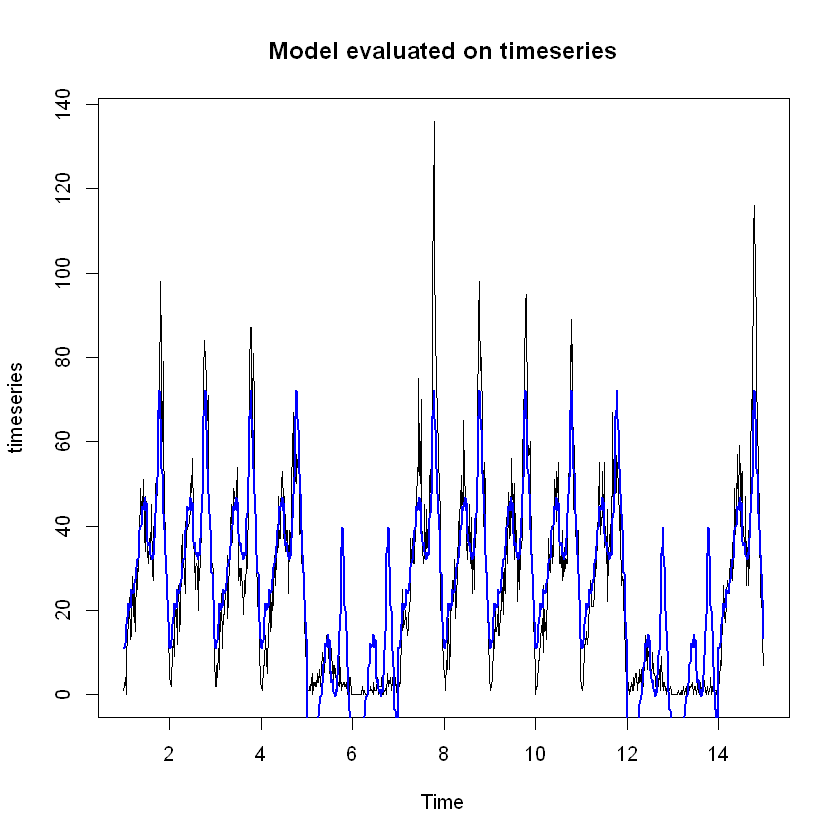

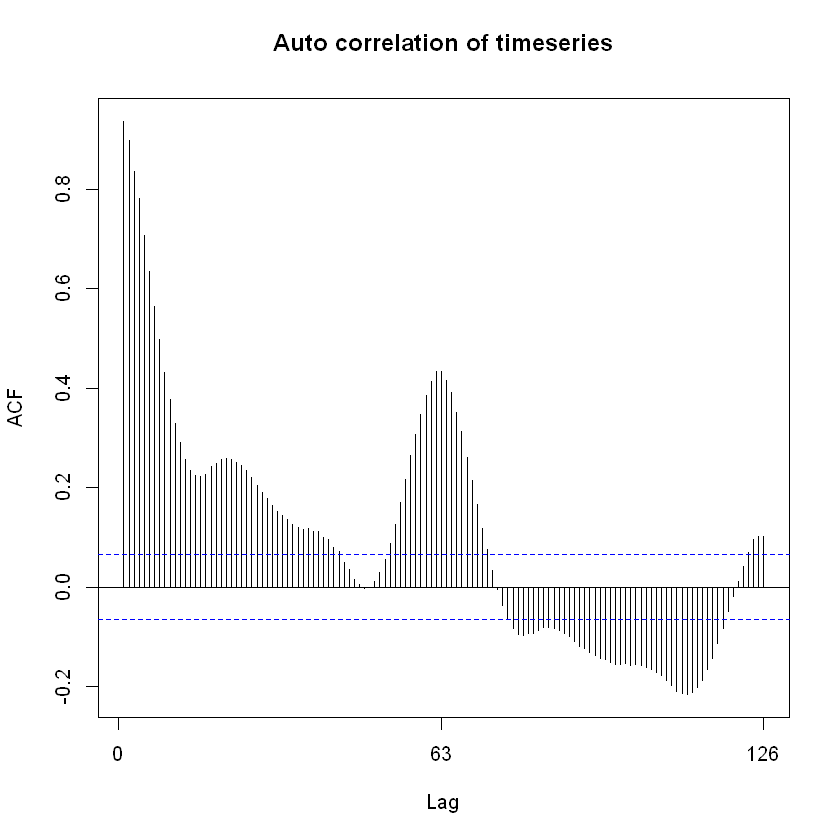

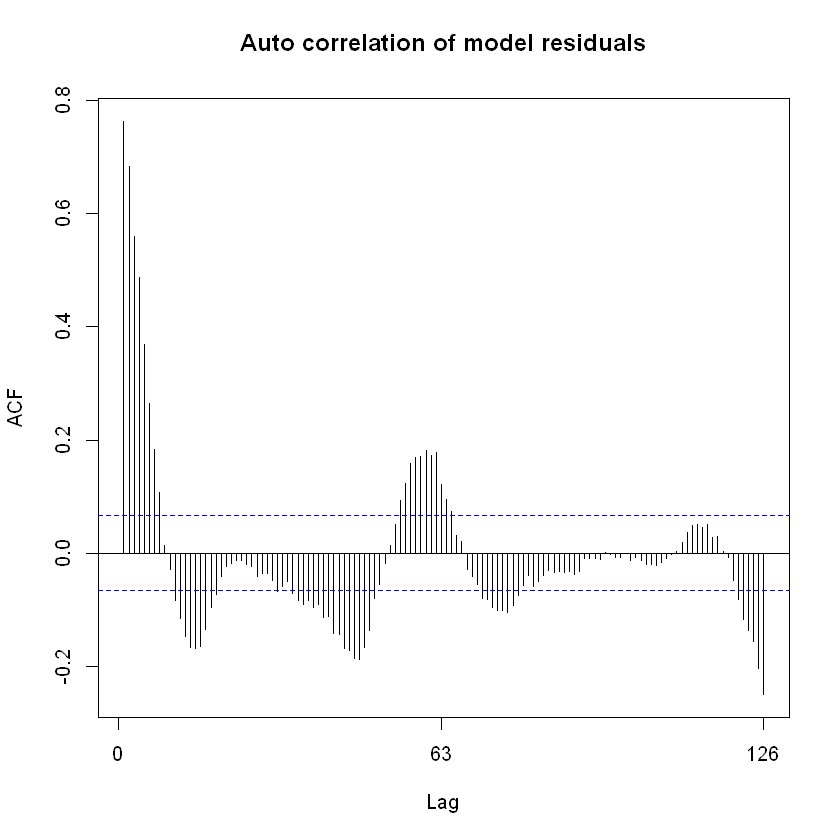

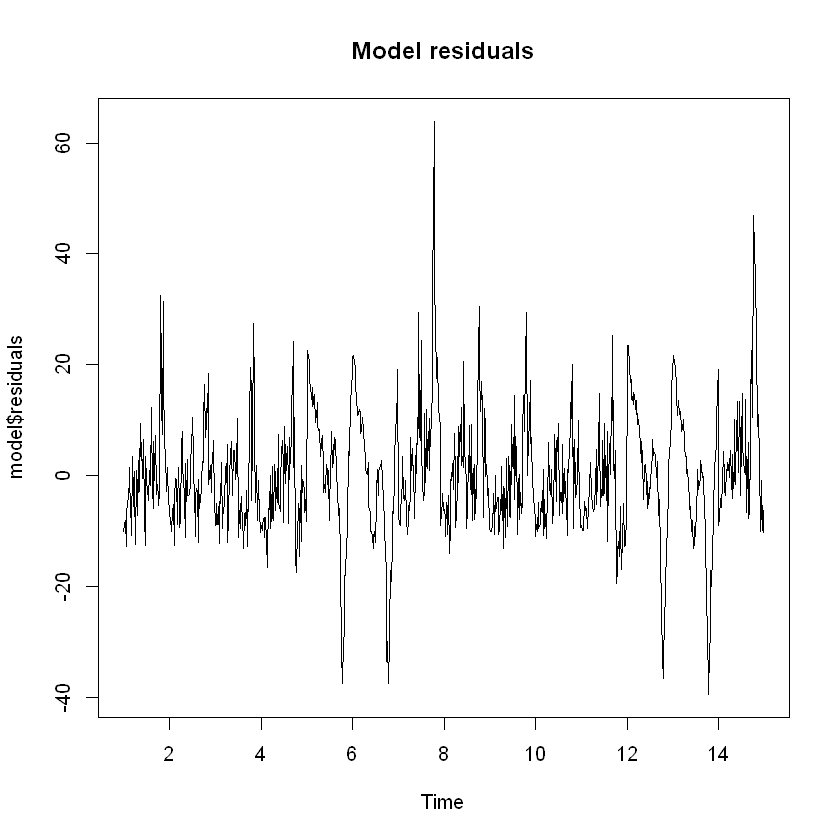

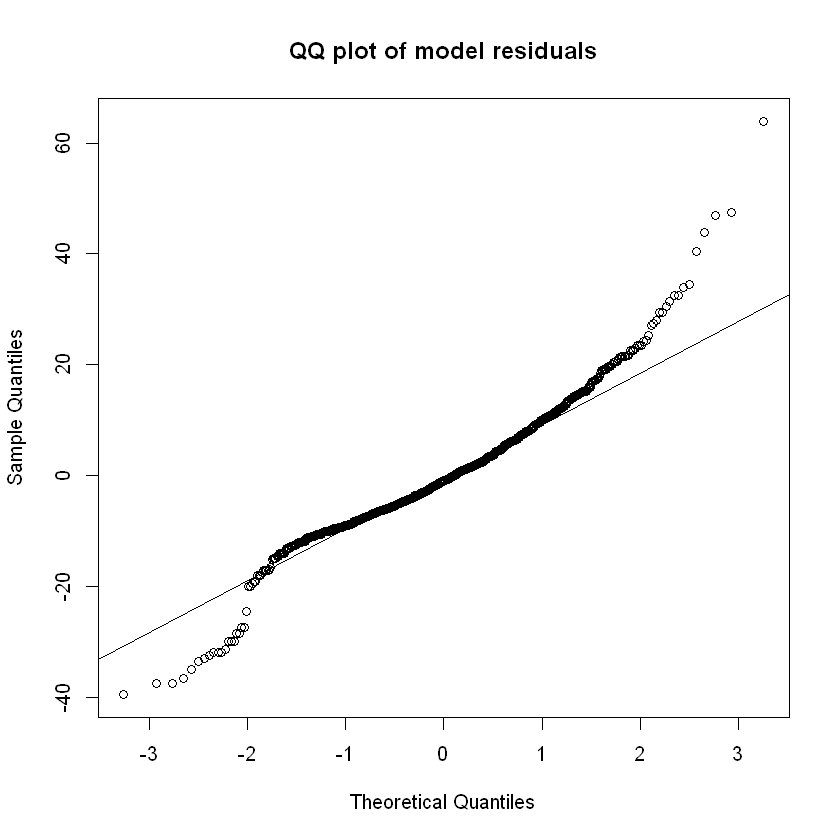

In [352]:
#coefficients(model)
coef<-coefficients(model)
plot(timeseries,main='Model evaluated on timeseries')
lines(model$fitted, lwd = 2,col='blue')

#model testing
Acf(timeseries,main='Auto correlation of timeseries')
Acf(model$residuals,main='Auto correlation of model residuals')
plot(model$residuals,main='Model residuals')
qqnorm(model$residuals,main='QQ plot of model residuals')
qqline(model$residuals)

In [356]:

mymodel  =  coef[1] + coef[2]*dtype + seasonal_data$S1*coef[3]+ seasonal_data$S2*coef[4]+ seasonal_data$S3*coef[5]+ seasonal_data$S4*coef[6]+ seasonal_data$S5*coef[7]+ seasonal_data$S6*coef[8]+ seasonal_data$S7*coef[9]+ seasonal_data$S8*coef[10]+ seasonal_data$S9*coef[11]+ seasonal_data$S10*coef[12]+ seasonal_data$S11*coef[13]+ seasonal_data$S12*coef[14]+ seasonal_data$S13*coef[15]+ seasonal_data$S14*coef[16]+ seasonal_data$S15*coef[17]+ seasonal_data$S16*coef[18]+ seasonal_data$S17*coef[19]+ seasonal_data$S18*coef[20]+ seasonal_data$S19*coef[21]+ seasonal_data$S20*coef[22]+ seasonal_data$S21*coef[23]+ seasonal_data$S22*coef[24]+ seasonal_data$S23*coef[25]+ seasonal_data$S24*coef[26]+ seasonal_data$S25*coef[27]+ seasonal_data$S26*coef[28]+ seasonal_data$S27*coef[29]+ seasonal_data$S28*coef[30]+ seasonal_data$S29*coef[31]+ seasonal_data$S30*coef[32]+ seasonal_data$S31*coef[33]+ seasonal_data$S32*coef[34]+ seasonal_data$S33*coef[35]+ seasonal_data$S34*coef[36]+ seasonal_data$S35*coef[37]+ seasonal_data$S36*coef[38]+ seasonal_data$S37*coef[39]+ seasonal_data$S38*coef[40]+ seasonal_data$S39*coef[41]+ seasonal_data$S40*coef[42]+ seasonal_data$S41*coef[43]+ seasonal_data$S42*coef[44]+ seasonal_data$S43*coef[45]+ seasonal_data$S44*coef[46]+ seasonal_data$S45*coef[47]+ seasonal_data$S46*coef[48]+ seasonal_data$S47*coef[49]+ seasonal_data$S48*coef[50]+ seasonal_data$S49*coef[51]+ seasonal_data$S50*coef[52]+ seasonal_data$S51*coef[53]+ seasonal_data$S52*coef[54]+ seasonal_data$S53*coef[55]+ seasonal_data$S54*coef[56]+ seasonal_data$S55*coef[57]+ seasonal_data$S56*coef[58]+ seasonal_data$S57*coef[59]+ seasonal_data$S58*coef[60]+ seasonal_data$S59*coef[61]+ seasonal_data$S60*coef[62]+ seasonal_data$S61*coef[63]+ seasonal_data$S62*coef[64]

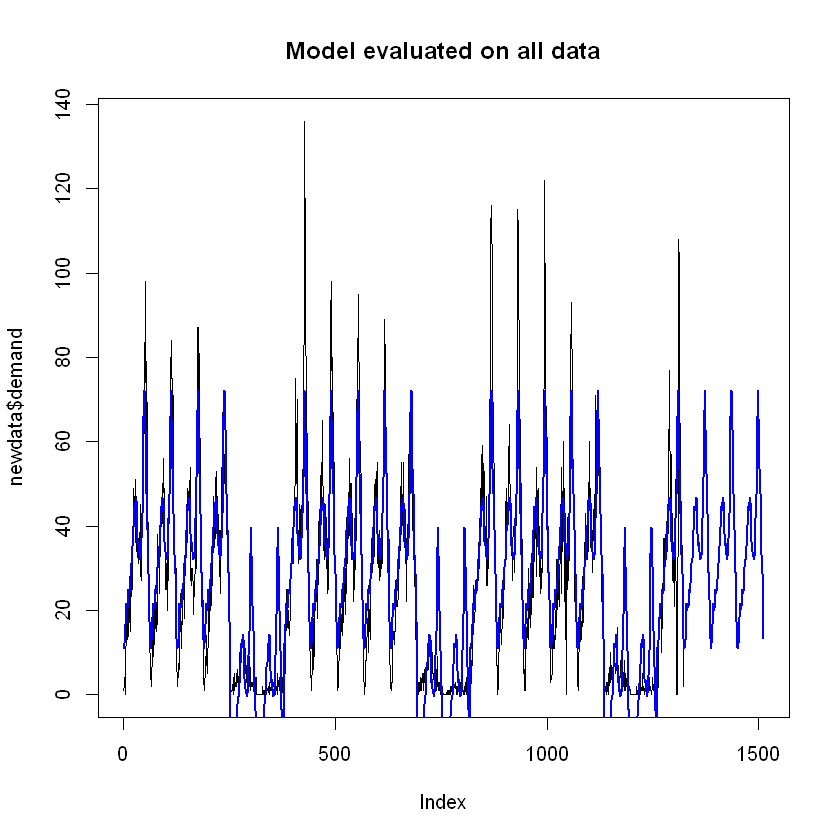

In [357]:
plot(newdata$demand,type='l',main='Model evaluated on all data')
lines(mymodel,lwd = 2,col='blue')

# LM with daytype multiplied by season

In [11]:
model<-tslm(timeseries ~ dtype[1:882] *(
            
 + seasonal_data[1:882, 5+1 ]
  + seasonal_data[1:882, 5+2 ]
  + seasonal_data[1:882, 5+3 ]+ seasonal_data[1:882, 5+4 ]
 + seasonal_data[1:882, 5+5 ]+ seasonal_data[1:882, 5+6 ]+ seasonal_data[1:882, 5+7 ]+ seasonal_data[1:882, 5+8 ]
 + seasonal_data[1:882,  5+9]+ seasonal_data[1:882, 5+10 ]+ seasonal_data[1:882, 5+11 ]+ seasonal_data[1:882, 5+12 ]
 + seasonal_data[1:882, 5+13 ]+ seasonal_data[1:882, 5+14 ]+ seasonal_data[1:882, 5+15 ]+ seasonal_data[1:882, 5+16 ]
 + seasonal_data[1:882, 5+17 ]+ seasonal_data[1:882, 5+18 ]+ seasonal_data[1:882, 5+19 ]+ seasonal_data[1:882, 5+20 ]
 + seasonal_data[1:882, 5+21 ]+ seasonal_data[1:882, 5+22 ]+ seasonal_data[1:882, 5+23 ]+ seasonal_data[1:882, 5+24 ]
 + seasonal_data[1:882, 5+25 ]+ seasonal_data[1:882, 5+26 ]+ seasonal_data[1:882, 5+27 ]+ seasonal_data[1:882, 5+28 ]
+ seasonal_data[1:882, 5+29 ]
+ seasonal_data[1:882, 5+30 ]+ seasonal_data[1:882, 5+31 ]+ seasonal_data[1:882, 5+32]
+ seasonal_data[1:882, 5+33 ]
+ seasonal_data[1:882, 5+34 ]+ seasonal_data[1:882, 5+35 ]+ seasonal_data[1:882, 5+36 ]
+ seasonal_data[1:882, 5+37 ]
+ seasonal_data[1:882, 5+38 ]
+ seasonal_data[1:882, 5+39 ]+ seasonal_data[1:882, 5+40 ]
+ seasonal_data[1:882, 5+41 ]+ seasonal_data[1:882, 5+42 ]
+ seasonal_data[1:882, 5+43 ]+ seasonal_data[1:882, 5+44 ]
+ seasonal_data[1:882, 5+45 ]+ seasonal_data[1:882, 5+46 ]
+ seasonal_data[1:882, 5+47 ]+ seasonal_data[1:882, 5+48 ]
+ seasonal_data[1:882, 5+49 ]+ seasonal_data[1:882, 5+50 ]
+ seasonal_data[1:882, 5+51 ]+ seasonal_data[1:882, 5+52 ]
+ seasonal_data[1:882, 5+53 ]+ seasonal_data[1:882, 5+54 ]
+ seasonal_data[1:882, 5+55 ]
+ seasonal_data[1:882, 5+56 ]
+ seasonal_data[1:882, 5+57 ]
+ seasonal_data[1:882, 5+58 ]
+ seasonal_data[1:882, 5+59 ]
+ seasonal_data[1:882, 5+60 ]
+ seasonal_data[1:882, 5+61 ]
+ seasonal_data[1:882, 5+62 ]

                )
            
           )

summary(model)


Call:
tslm(formula = timeseries ~ dtype[1:882] * (+seasonal_data[1:882, 
    5 + 1] + seasonal_data[1:882, 5 + 2] + seasonal_data[1:882, 
    5 + 3] + seasonal_data[1:882, 5 + 4] + seasonal_data[1:882, 
    5 + 5] + seasonal_data[1:882, 5 + 6] + seasonal_data[1:882, 
    5 + 7] + seasonal_data[1:882, 5 + 8] + seasonal_data[1:882, 
    5 + 9] + seasonal_data[1:882, 5 + 10] + seasonal_data[1:882, 
    5 + 11] + seasonal_data[1:882, 5 + 12] + seasonal_data[1:882, 
    5 + 13] + seasonal_data[1:882, 5 + 14] + seasonal_data[1:882, 
    5 + 15] + seasonal_data[1:882, 5 + 16] + seasonal_data[1:882, 
    5 + 17] + seasonal_data[1:882, 5 + 18] + seasonal_data[1:882, 
    5 + 19] + seasonal_data[1:882, 5 + 20] + seasonal_data[1:882, 
    5 + 21] + seasonal_data[1:882, 5 + 22] + seasonal_data[1:882, 
    5 + 23] + seasonal_data[1:882, 5 + 24] + seasonal_data[1:882, 
    5 + 25] + seasonal_data[1:882, 5 + 26] + seasonal_data[1:882, 
    5 + 27] + seasonal_data[1:882, 5 + 28] + seasonal_data[1:882

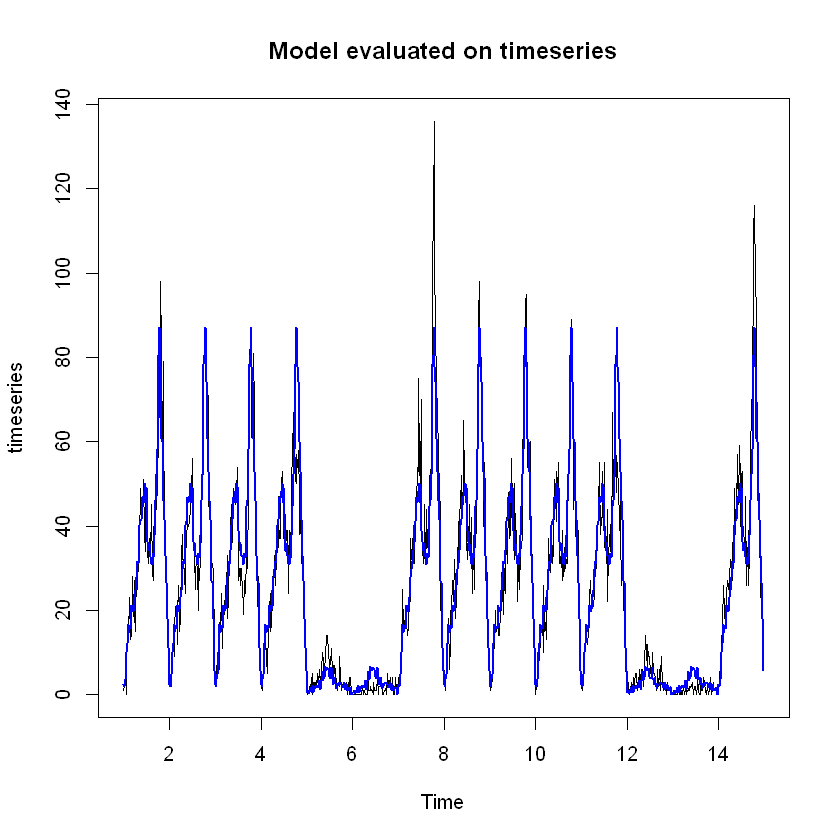

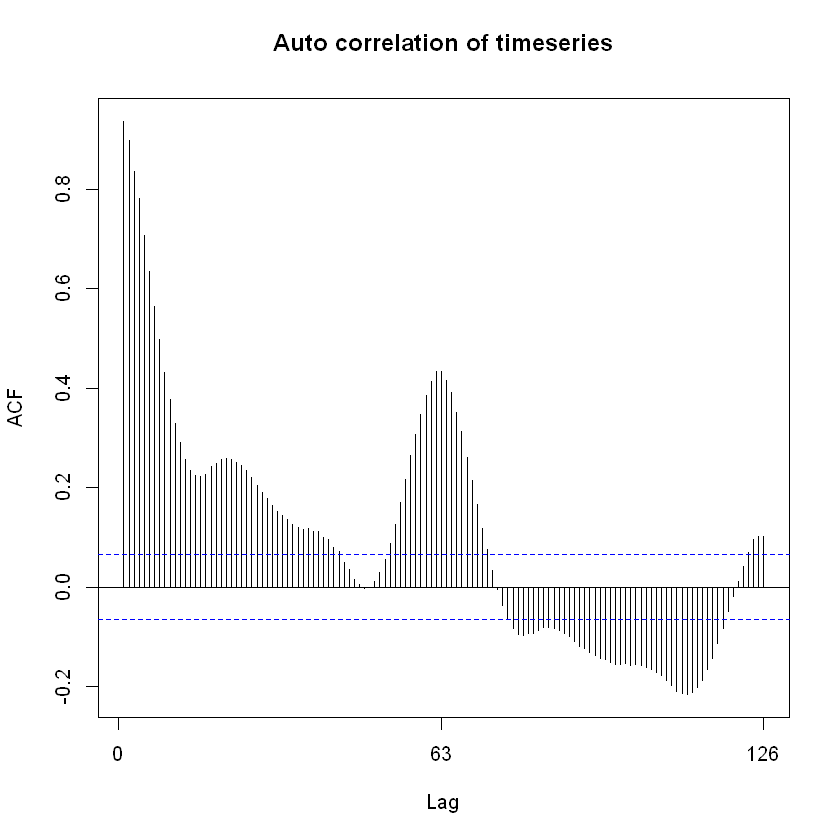

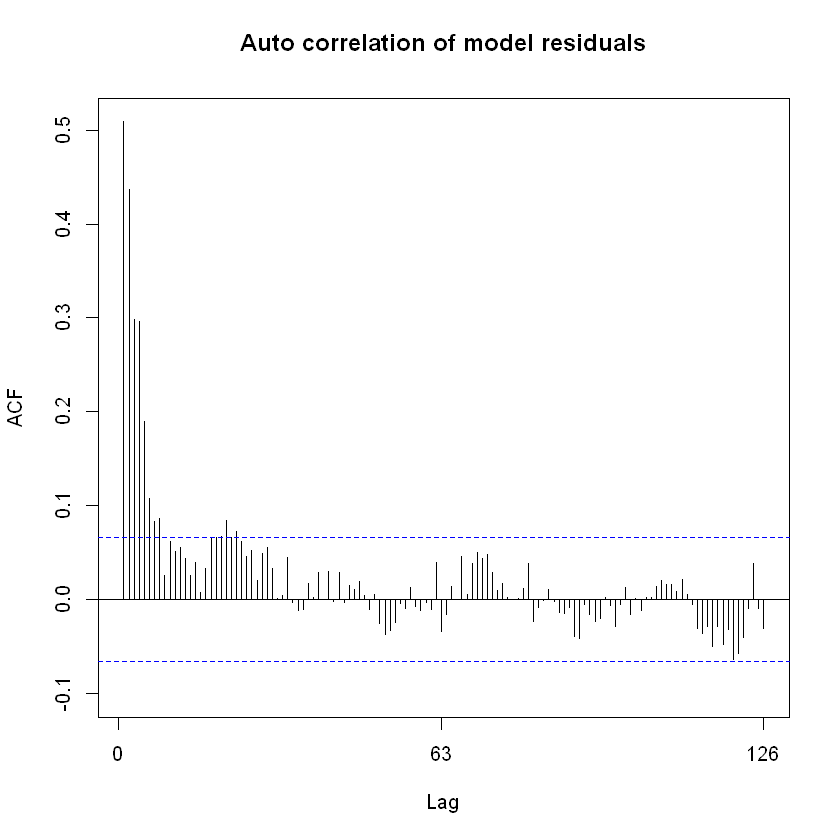

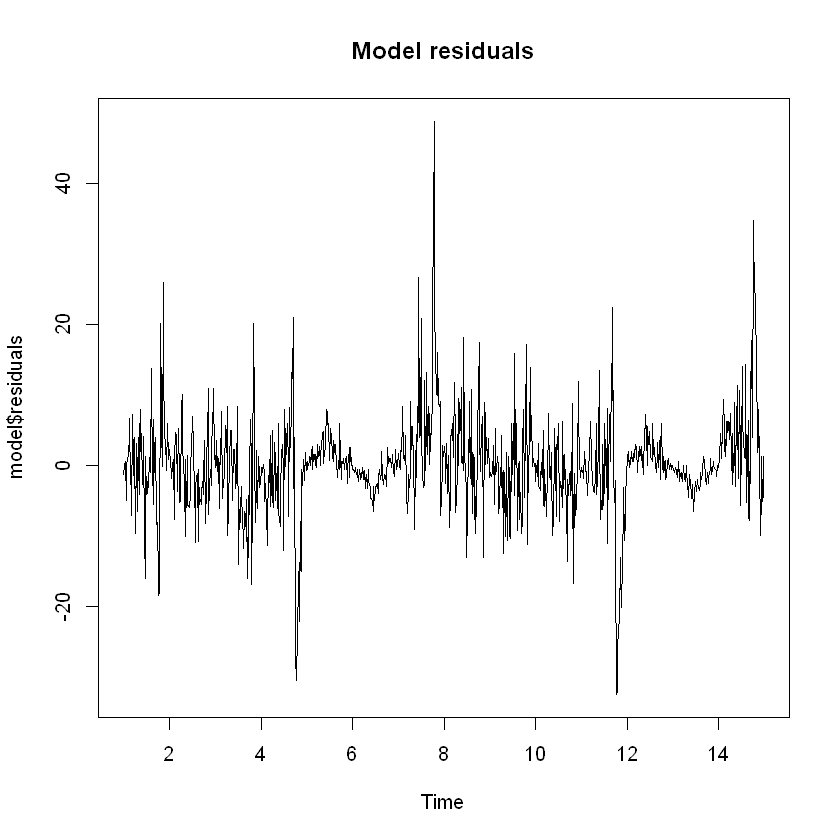

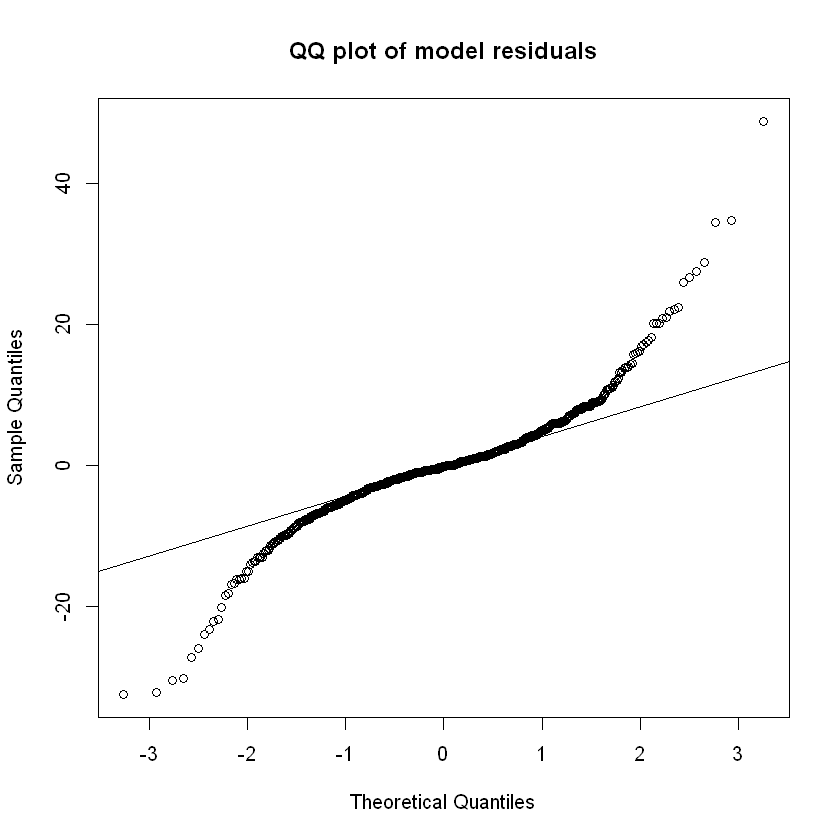

In [12]:
#coefficients(model)
coef<-coefficients(model)
plot(timeseries,main='Model evaluated on timeseries')
lines(model$fitted, lwd = 2,col='blue')

#model testing
Acf(timeseries,main='Auto correlation of timeseries')
Acf(model$residuals,main='Auto correlation of model residuals')
plot(model$residuals,main='Model residuals')
qqnorm(model$residuals,main='QQ plot of model residuals')
qqline(model$residuals)

In [13]:
mymodel  =  (coef[1] + coef[2]*dtype + seasonal_data$S1*coef[3] + seasonal_data$S2*coef[4] + 
             seasonal_data$S3*coef[5]+ seasonal_data$S4*coef[6] + seasonal_data$S5*coef[7]+ 
             seasonal_data$S6*coef[8]+ seasonal_data$S7*coef[9]+ seasonal_data$S8*coef[10]+ 
             seasonal_data$S9*coef[11]+ seasonal_data$S10*coef[12]+ seasonal_data$S11*coef[13]+
             seasonal_data$S12*coef[14]+ seasonal_data$S13*coef[15]+ seasonal_data$S14*coef[16]+
             seasonal_data$S15*coef[17]+ seasonal_data$S16*coef[18]+ seasonal_data$S17*coef[19]+ 
             seasonal_data$S18*coef[20]+ seasonal_data$S19*coef[21]+ seasonal_data$S20*coef[22]+
             seasonal_data$S21*coef[23]+ seasonal_data$S22*coef[24]+ seasonal_data$S23*coef[25]+
             seasonal_data$S24*coef[26]+ seasonal_data$S25*coef[27]+ seasonal_data$S26*coef[28]+ 
             seasonal_data$S27*coef[29]+ seasonal_data$S28*coef[30]+ seasonal_data$S29*coef[31]+
             seasonal_data$S30*coef[32]+ seasonal_data$S31*coef[33]+ seasonal_data$S32*coef[34]+
             seasonal_data$S33*coef[35]+ seasonal_data$S34*coef[36]+ seasonal_data$S35*coef[37]+ 
             seasonal_data$S36*coef[38]+ seasonal_data$S37*coef[39]+ seasonal_data$S38*coef[40]+
             seasonal_data$S39*coef[41]+ seasonal_data$S40*coef[42]+ seasonal_data$S41*coef[43]+
             seasonal_data$S42*coef[44]+ seasonal_data$S43*coef[45]+ seasonal_data$S44*coef[46]+ 
             seasonal_data$S45*coef[47]+ seasonal_data$S46*coef[48]+ seasonal_data$S47*coef[49]+ 
             seasonal_data$S48*coef[50]+ seasonal_data$S49*coef[51]+ seasonal_data$S50*coef[52]+
             seasonal_data$S51*coef[53]+ seasonal_data$S52*coef[54]+ seasonal_data$S53*coef[55]+
             seasonal_data$S54*coef[56]+ seasonal_data$S55*coef[57]+ seasonal_data$S56*coef[58]+
             seasonal_data$S57*coef[59]+ seasonal_data$S58*coef[60]+ seasonal_data$S59*coef[61]+
             seasonal_data$S60*coef[62]+ seasonal_data$S61*coef[63]+ seasonal_data$S62*coef[64]
    +dtype * (seasonal_data$S1*coef[65] + seasonal_data$S2*coef[66] + seasonal_data$S3*coef[67] +
              seasonal_data$S4*coef[68] + seasonal_data$S5*coef[69] + seasonal_data$S6*coef[70] + 
              seasonal_data$S7*coef[71] + seasonal_data$S8*coef[72] + seasonal_data$S9*coef[73] + 
              seasonal_data$S10*coef[74] + seasonal_data$S11*coef[75] + seasonal_data$S12*coef[76] + 
              seasonal_data$S13*coef[77] + seasonal_data$S14*coef[78] + seasonal_data$S15*coef[79] + 
              seasonal_data$S16*coef[80] + seasonal_data$S17*coef[81] + seasonal_data$S18*coef[82] + 
              seasonal_data$S19*coef[83] + seasonal_data$S20*coef[84] + seasonal_data$S21*coef[85] + 
              seasonal_data$S22*coef[86] + seasonal_data$S23*coef[87] + seasonal_data$S24*coef[88] + 
              seasonal_data$S25*coef[89] + seasonal_data$S26*coef[90] + seasonal_data$S27*coef[91] + 
              seasonal_data$S28*coef[92] + seasonal_data$S29*coef[93] + seasonal_data$S30*coef[94] + 
              seasonal_data$S31*coef[95] + seasonal_data$S32*coef[96] + seasonal_data$S33*coef[97] + 
              seasonal_data$S34*coef[98] + seasonal_data$S35*coef[99] + seasonal_data$S36*coef[100] + 
              seasonal_data$S37*coef[101] + seasonal_data$S38*coef[102] + seasonal_data$S39*coef[103] + 
              seasonal_data$S40*coef[104] + seasonal_data$S41*coef[105] + seasonal_data$S42*coef[106] + 
              seasonal_data$S43*coef[107] + seasonal_data$S44*coef[108] + seasonal_data$S45*coef[109] + 
              seasonal_data$S46*coef[110] + seasonal_data$S47*coef[111] + seasonal_data$S48*coef[112] + 
              seasonal_data$S49*coef[113] + seasonal_data$S50*coef[114] + seasonal_data$S51*coef[115] + 
              seasonal_data$S52*coef[116] + seasonal_data$S53*coef[117] + seasonal_data$S54*coef[118] + 
              seasonal_data$S55*coef[119] + seasonal_data$S56*coef[120] + seasonal_data$S57*coef[121] + 
              seasonal_data$S58*coef[122] + seasonal_data$S59*coef[123] + seasonal_data$S60*coef[124] + 
              seasonal_data$S61*coef[125] + seasonal_data$S62*coef[126])
            
            
            )


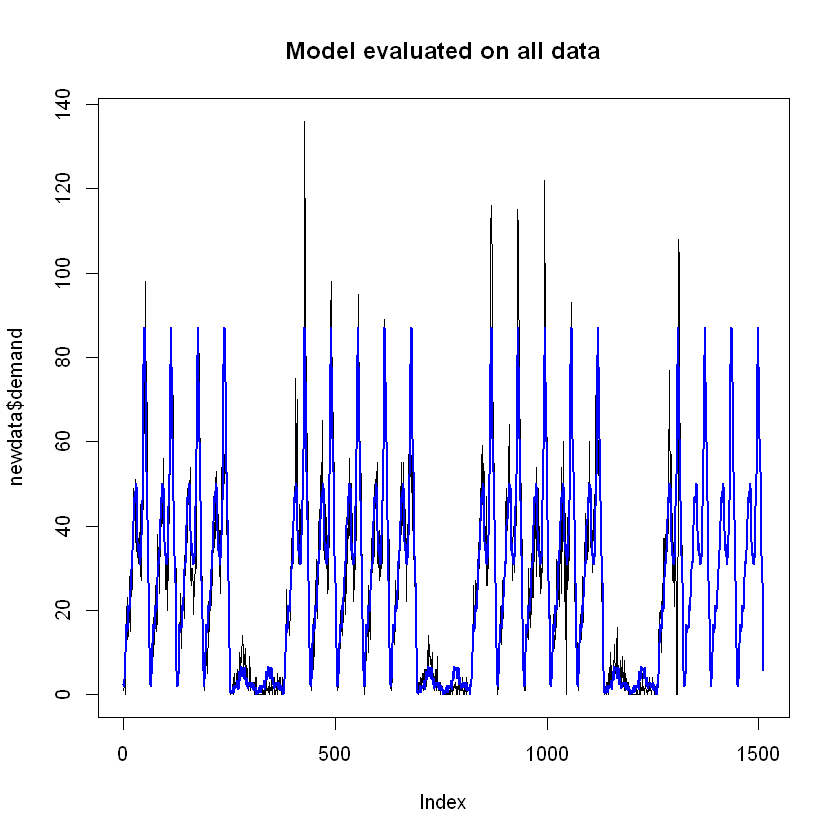

In [22]:
plot(newdata$demand,type='l',main='Model evaluated on all data')
lines(mymodel,lwd = 2,col='blue')

# Final model: LM with interactions between daytype,daynumber and season

Create day number column using calendar of 2005.Numbering is like this : Monday =1,Tuesday =2 etc.We have a slight concern that numbering the days like that may be bad since we introduce an ordering to them ( e.g. Tuesday < Wednesday ) but we think that in time series analysis ,this is not a factor since days ARE naturally ordered.

In [11]:
day_column<-rep(1,1512)
for(i in seq(1:1512)){
    
        day<-strtoi(substr(newdata$date.and.time[i],9,10),base = 10)
        if(day==7 | day==14 | day==21){
            day_column[i]<-1
        }else if(day==1 | day==8 | day==15 | day==22){
            day_column[i]<-2
        }else if(day==2 | day==9 | day==16 | day==23){
            day_column[i]<-3
        }else if(day==3 | day==10 | day==17 | day==24){
            day_column[i]<-4
        }else if(day==4 | day==11 | day==18 | day==25){
            day_column[i]<-5
        }else if(day==5 | day==12 | day==19 | day==26){
            day_column[i]<-6
        }else if(day==6 | day==13 | day==20){
            day_column[i]<-7
        }
}
            

In [12]:
#dataframe used to represent our model.The columns are the variables.
model.data<-data.frame(seasonal_data$demand, seasonal_data$dtype, day_column, seasonal_data[6:67]
,seasonal_data$dtype*seasonal_data[6:67], day_column*seasonal_data[6:67]
,seasonal_data$dtype*day_column*seasonal_data[6:67])

colnames(model.data)<-c('demand','daytype','daynumber',colnames(model.data)[4:65],
                        paste(colnames(model.data)[4:65],'.dtype',sep = ''),
                        paste(colnames(model.data)[4:65],'.day',sep = ''),
                        paste(colnames(model.data)[4:65],'.day.dtype',sep = ''))

trainingdata<-model.data[1:882,]


head(model.data)
dim(model.data)
names(model.data)

demand,daytype,daynumber,S1,S2,S3,S4,S5,S6,S7,...,S53.day.dtype,S54.day.dtype,S55.day.dtype,S56.day.dtype,S57.day.dtype,S58.day.dtype,S59.day.dtype,S60.day.dtype,S61.day.dtype,S62.day.dtype
1,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


[1] 1512  251

[1] "demand"        "daytype"       "daynumber"     "S1"           
  [5] "S2"            "S3"            "S4"            "S5"           
  [9] "S6"            "S7"            "S8"            "S9"           
 [13] "S10"           "S11"           "S12"           "S13"          
 [17] "S14"           "S15"           "S16"           "S17"          
 [21] "S18"           "S19"           "S20"           "S21"          
 [25] "S22"           "S23"           "S24"           "S25"          
 [29] "S26"           "S27"           "S28"           "S29"          
 [33] "S30"           "S31"           "S32"           "S33"          
 [37] "S34"           "S35"           "S36"           "S37"          
 [41] "S38"           "S39"           "S40"           "S41"          
 [45] "S42"           "S43"           "S44"           "S45"          
 [49] "S46"           "S47"           "S48"           "S49"          
 [53] "S50"           "S51"           "S52"           "S53"          
 [57] "S54"           "S55"           "S56"           "S57"          
 [61] "S58"           "S59"           "S60"           "S61"          
 [65] "S62"           "S1.dtype"      "S2.dtype"      "S3.dtype"     
 [69] "S4.dtype"      "S5.dtype"      "S6.dtype"      "S7.dtype"     
 [73] "S8.dtype"      "S9.dtype"      "S10.dtype"     "S11.dtype"    
 [77] "S12.dtype"     "S13.dtype"     "S14.dtype"     "S15.dtype"    
 [81] "S16.dtype"     "S17.dtype"     "S18.dtype"     "S19.dtype"    
 [85] "S20.dtype"     "S21.dtype"     "S22.dtype"     "S23.dtype"    
 [89] "S24.dtype"     "S25.dtype"     "S26.dtype"     "S27.dtype"    
 [93] "S28.dtype"     "S29.dtype"     "S30.dtype"     "S31.dtype"    
 [97] "S32.dtype"     "S33.dtype"     "S34.dtype"     "S35.dtype"    
[101] "S36.dtype"     "S37.dtype"     "S38.dtype"     "S39.dtype"    
[105] "S40.dtype"     "S41.dtype"     "S42.dtype"     "S43.dtype"    
[109] "S44.dtype"     "S45.dtype"     "S46.dtype"     "S47.dtype"    
[113] "S48.dtype"     "S49.dtype"     "S50.dtype"     "S51.dtype"    
[117] "S52.dtype"     "S53.dtype"     "S54.dtype"     "S55.dtype"    
[121] "S56.dtype"     "S57.dtype"     "S58.dtype"     "S59.dtype"    
[125] "S60.dtype"     "S61.dtype"     "S62.dtype"     "S1.day"       
[129] "S2.day"        "S3.day"        "S4.day"        "S5.day"       
[133] "S6.day"        "S7.day"        "S8.day"        "S9.day"       
[137] "S10.day"       "S11.day"       "S12.day"       "S13.day"      
[141] "S14.day"       "S15.day"       "S16.day"       "S17.day"      
[145] "S18.day"       "S19.day"       "S20.day"       "S21.day"      
[149] "S22.day"       "S23.day"       "S24.day"       "S25.day"      
[153] "S26.day"       "S27.day"       "S28.day"       "S29.day"      
[157] "S30.day"       "S31.day"       "S32.day"       "S33.day"      
[161] "S34.day"       "S35.day"       "S36.day"       "S37.day"      
[165] "S38.day"       "S39.day"       "S40.day"       "S41.day"      
[169] "S42.day"       "S43.day"       "S44.day"       "S45.day"      
[173] "S46.day"       "S47.day"       "S48.day"       "S49.day"      
[177] "S50.day"       "S51.day"       "S52.day"       "S53.day"      
[181] "S54.day"       "S55.day"       "S56.day"       "S57.day"      
[185] "S58.day"       "S59.day"       "S60.day"       "S61.day"      
[189] "S62.day"       "S1.day.dtype"  "S2.day.dtype"  "S3.day.dtype" 
[193] "S4.day.dtype"  "S5.day.dtype"  "S6.day.dtype"  "S7.day.dtype" 
[197] "S8.day.dtype"  "S9.day.dtype"  "S10.day.dtype" "S11.day.dtype"
[201] "S12.day.dtype" "S13.day.dtype" "S14.day.dtype" "S15.day.dtype"
[205] "S16.day.dtype" "S17.day.dtype" "S18.day.dtype" "S19.day.dtype"
[209] "S20.day.dtype" "S21.day.dtype" "S22.day.dtype" "S23.day.dtype"
[213] "S24.day.dtype" "S25.day.dtype" "S26.day.dtype" "S27.day.dtype"
[217] "S28.day.dtype" "S29.day.dtype" "S30.day.dtype" "S31.day.dtype"
[221] "S32.day.dtype" "S33.day.dtype" "S34.day.dtype" "S35.day.dtype"
[225] "S36.day.dtype" "S37.day.dtype" "S38.day.dtype" "S39.day.dtype"
[229] "S40.d

We have 250 total variables which include daytype,daynumber ,season as well as interactions between them.

In [13]:
model<-lm(demand~.,trainingdata)

summary(model)


Call:
lm(formula = demand ~ ., data = trainingdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.400  -2.038   0.000   2.000  26.650 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.44286    3.80241   2.483  0.01327 *  
daytype        -1.60000    3.05316  -0.524  0.60043    
daynumber      -0.71429    1.37928  -0.518  0.60473    
S1             -7.69286   22.09913  -0.348  0.72788    
S2             -8.36786   22.09913  -0.379  0.70507    
S3             -9.84286   22.09913  -0.445  0.65619    
S4             -2.04286   22.09913  -0.092  0.92638    
S5              0.75714   22.09913   0.034  0.97268    
S6             10.93214   22.09913   0.495  0.62099    
S7             14.45714   22.09913   0.654  0.51322    
S8             17.90714   22.09913   0.810  0.41807    
S9              6.90714   22.09913   0.313  0.75472    
S10            16.00714   22.09913   0.724  0.46913    
S11            12.38214   22.09913   0.560  0.57547   

As we can see from the p-values ,the majority of the variables don't appear to be very significant but we keep them to retain the structure of our model.Otherwise,our model lacks explainability.  
R squared comes out 0.947 and Adjusted R squared is 0.926 on the training data.

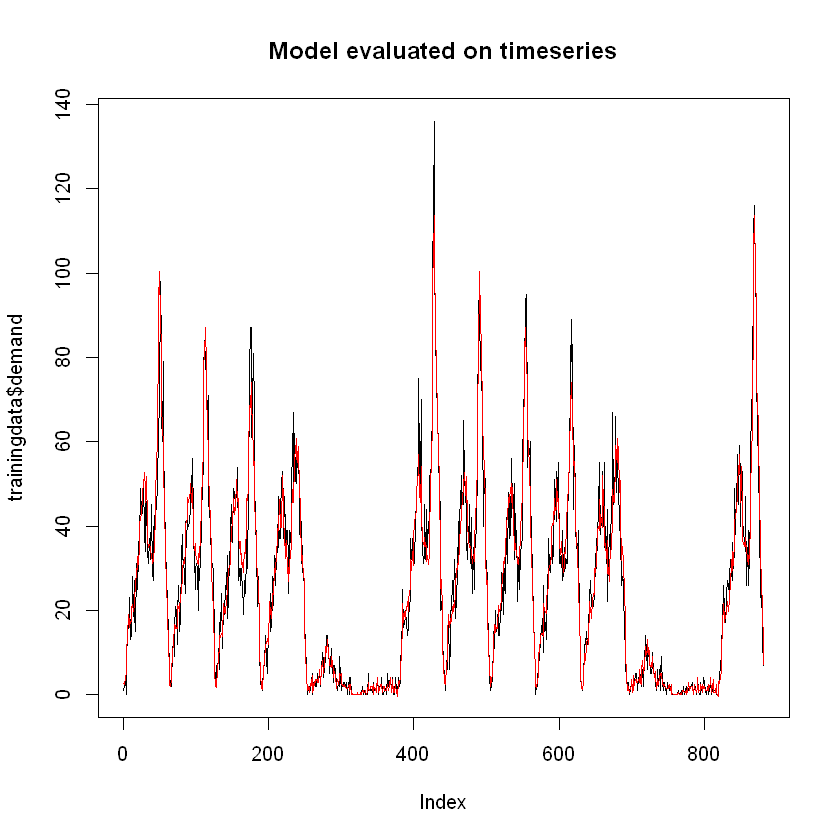

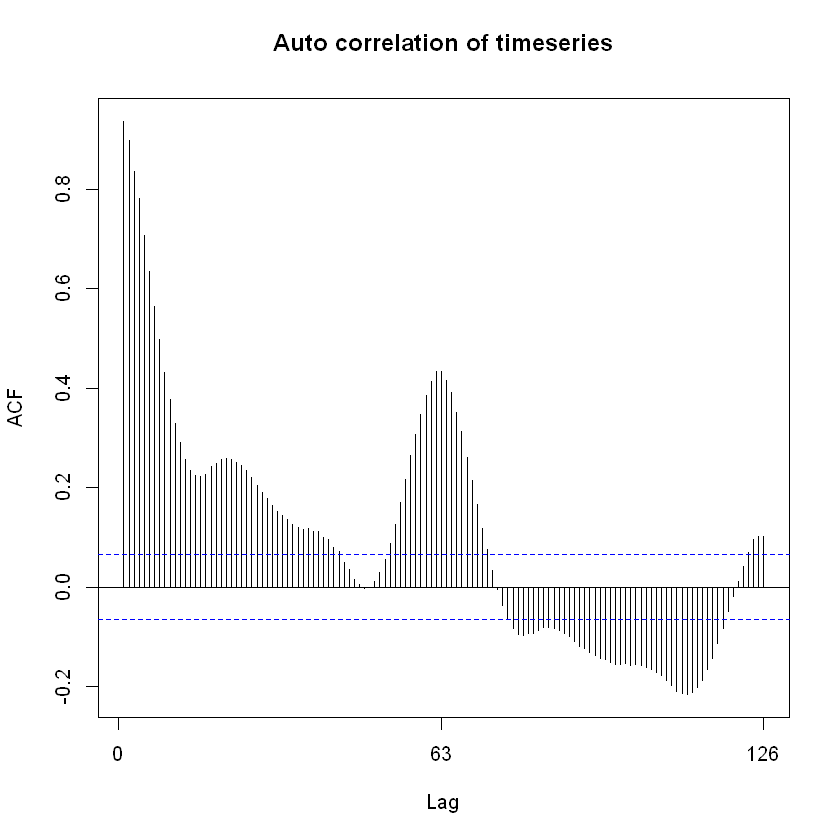

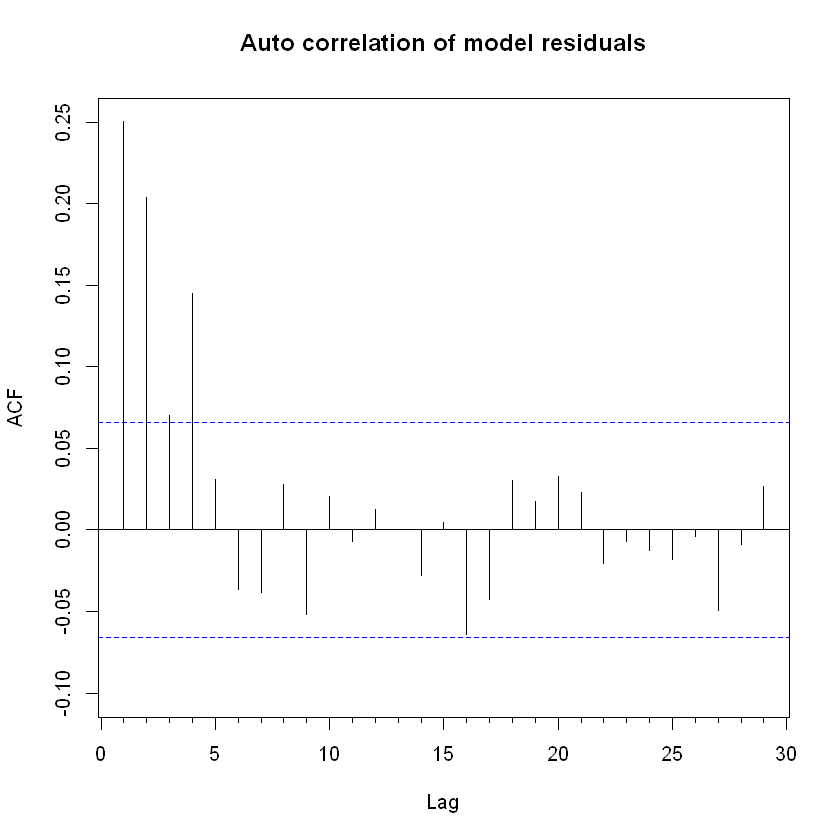

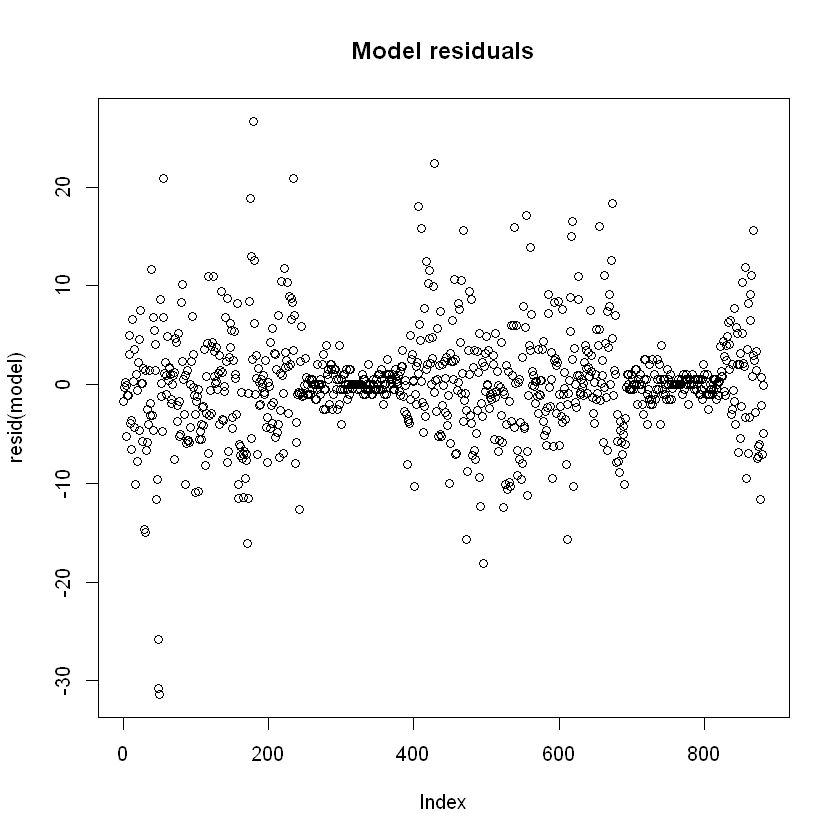

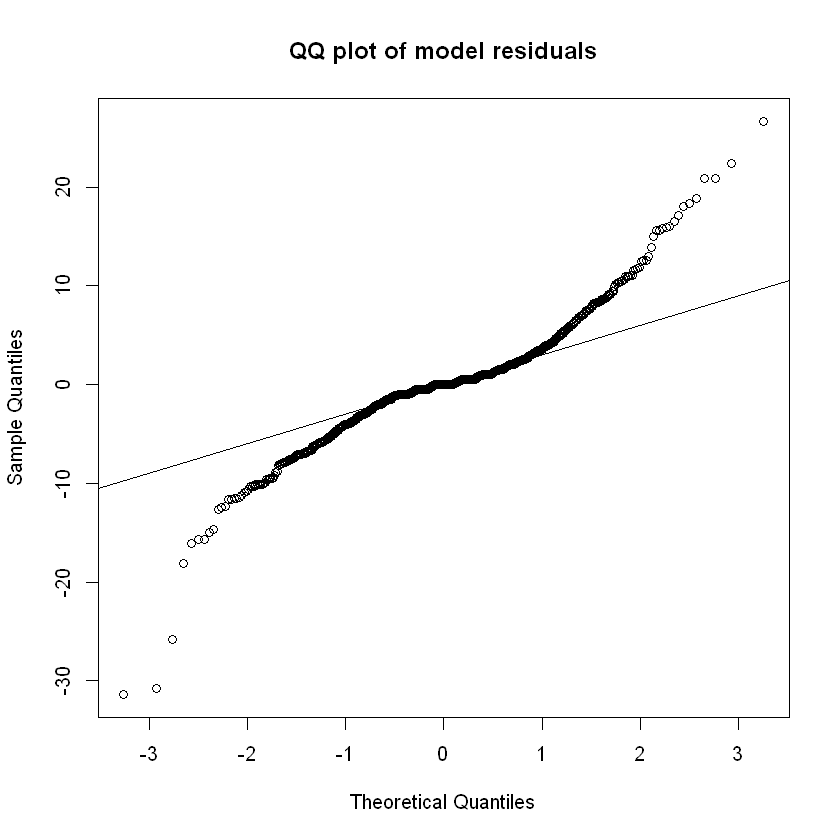

In [14]:
#coefficients(model)
coef<-coefficients(model)
plot(trainingdata$demand,main='Model evaluated on timeseries',type='l')
lines(model$fitted, lwd = 1,col='red')

#model testing
Acf(timeseries,main='Auto correlation of timeseries')
Acf(resid(model),main='Auto correlation of model residuals')
plot(resid(model),main='Model residuals')
qqnorm(resid(model),main='QQ plot of model residuals')
qqline(resid(model))

 **Auto correlation**  
 Strong autocorrelation (positive or negative) at a lag k larger than 1
and its multiples (2k, 3k, . . .) typically reflects a **cyclical pattern.** For example, strong positive lag-12 autocorrelation in monthly data will reflect an
annual seasonality (where values during a given month each year are positively correlated). 

Positive lag-1 autocorrelation (called “stickiness”) describes a series
where consecutive values move generally in the **same direction.**  

In addition to looking at the autocorrelation of the raw series, it is very useful
to look at the **autocorrelation of the residual series.** For example, after fitting
a regression model (or using any other forecasting method), we can examine
the autocorrelation of the series of residuals. If we have adequately modeled
the seasonal pattern, then the residual series should show no autocorrelation
at the season’s lag.

# Evaluation of our model on all data and forecasts

In [33]:
#We create a new dataframe to make the model calculation easier below
ones<-rep(1,1512)
#we remove the demand column since thats what we predict and we replace it with ones
#so they are multiplied by the intercept coefficient
final.model.data<-data.frame(ones,model.data[,-1])


head(final.model.data)
dim(final.model.data)

ones,daytype,daynumber,S1,S2,S3,S4,S5,S6,S7,...,S53.day.dtype,S54.day.dtype,S55.day.dtype,S56.day.dtype,S57.day.dtype,S58.day.dtype,S59.day.dtype,S60.day.dtype,S61.day.dtype,S62.day.dtype
1,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


[1] 1512  251

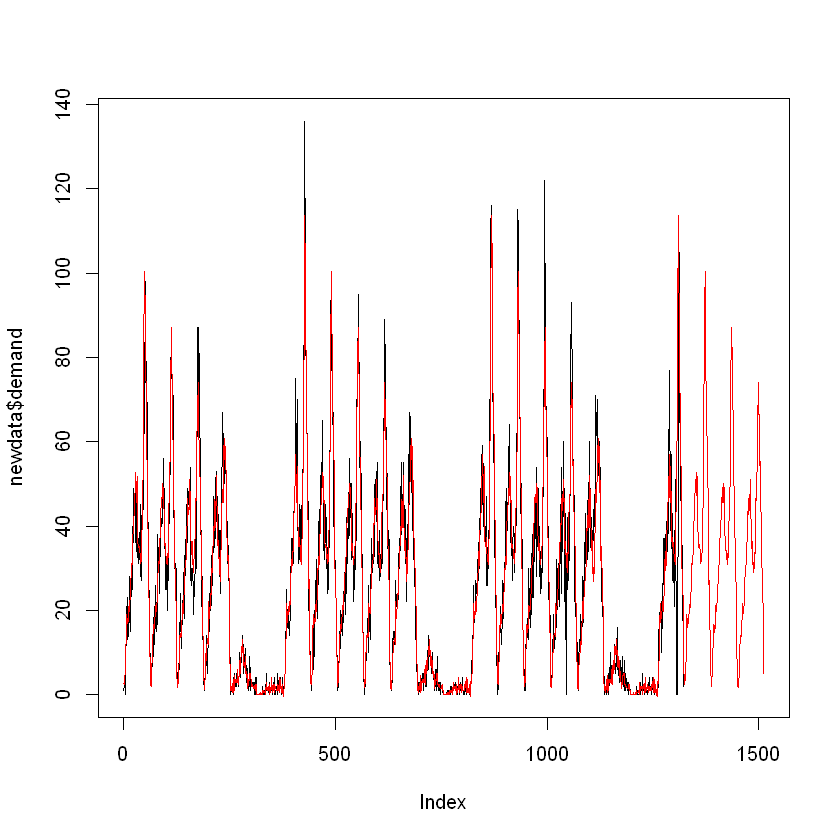

In [121]:
#coefficients(model)
coef<-coefficients(model)

mymodel = rowSums(mapply("*", as.data.frame(final.model.data),coef))

plot(newdata$demand,type='l')
lines(mymodel,lwd = 1,col='red')

# It looks good visually but lets check some metrics

## R squared on validation set

The adjustment in the “Adjusted R Square” value is a correction for the number of x variables included in the predictive model.

$$\bar R = 1 - \frac{SSE/(n-k-1)}{SST/(n-1)}$$

So, we should mainly consider the adjusted R-squared, which is a penalized R2 for a higher number of predictors.

In [66]:
actual.demand<-validation.set$demand
predicted.demand<-mymodel[883:1323]

residuals<-actual.demand-predicted.demand

#Adjusted R-Squared
n=length(actual.demand)
k=251-1 #Subtract one to ignore intercept
SSE=sum(residuals**2)
SSyy=sum((actual.demand-mean(actual.demand))**2)
1-(SSE/SSyy)*(n-1)/(n-(k+1))



[1] 0.6170806

## MAPE and MAE on validation set

In [322]:
comparisondata<-data.frame(newdata$date.and.time,newdata$demand,mymodel,newdata$demand-mymodel,newdata$daytype,newdata$myseason)
colnames(comparisondata)<-c('date.and.time','demand','predicted','residual','daytype','season')

In [323]:
head(comparisondata)

date.and.time,demand,predicted,residual,daytype,season
2005-03-01 06:30:00,1,2.70,-1.70,weekday,1
2005-03-01 06:45:00,2,2.35,-0.35,weekday,2
2005-03-01 07:00:00,4,3.80,0.20,weekday,3
2005-03-01 07:15:00,0,5.30,-5.30,weekday,4
2005-03-01 07:30:00,10,10.10,-0.10,weekday,5
2005-03-01 07:45:00,13,14.15,-1.15,weekday,6


In [324]:
comparison.validation<-data.frame(comparisondata[883:1323,],
        abs((comparisondata$demand-comparisondata$predicted)/comparisondata$demand*100)[883:1323],
        abs(comparisondata$demand-comparisondata$predicted)[883:1323])

colnames(comparison.validation)<-c(colnames(comparison.validation)[1:6],'APE','AE')

head(comparison.validation)

,date.and.time,demand,predicted,residual,daytype,season,APE,AE
883,2005-03-15 06:30:00,0,2.70,-2.70,weekday,1,Inf,2.70
884,2005-03-15 06:45:00,2,2.35,-0.35,weekday,2,17.50000,0.35
885,2005-03-15 07:00:00,4,3.80,0.20,weekday,3,5.00000,0.20
886,2005-03-15 07:15:00,7,5.30,1.70,weekday,4,24.28571,1.70
887,2005-03-15 07:30:00,13,10.10,2.90,weekday,5,22.30769,2.90
888,2005-03-15 07:45:00,11,14.15,-3.15,weekday,6,28.63636,3.15


In [325]:
with( comparison.validation , comparison.validation[ demand==0, ] )

,date.and.time,demand,predicted,residual,daytype,season,APE,AE
883,2005-03-15 06:30:00,0,2.700000e+00,-2.700000e+00,weekday,1,Inf,2.700000e+00
1045,2005-03-17 15:30:00,0,3.085000e+01,-3.085000e+01,weekday,37,Inf,3.085000e+01
1135,2005-03-19 06:30:00,0,1.000000e+00,-1.000000e+00,weekend,1,Inf,1.000000e+00
1136,2005-03-19 06:45:00,0,1.000000e+00,-1.000000e+00,weekend,2,Inf,1.000000e+00
1140,2005-03-19 07:45:00,0,2.000000e+00,-2.000000e+00,weekend,6,Inf,2.000000e+00
1141,2005-03-19 08:00:00,0,3.500000e+00,-3.500000e+00,weekend,7,Inf,3.500000e+00
1146,2005-03-19 09:15:00,0,3.500000e+00,-3.500000e+00,weekend,12,Inf,3.500000e+00
1192,2005-03-19 20:45:00,0,2.000000e+00,-2.000000e+00,weekend,58,Inf,2.000000e+00
1197,2005-03-19 22:00:00,0,3.571429e-01,-3.571429e-01,weekend,63,Inf,3.571429e-01
1198,2005-03-20 06:30:00,0,7.993606e-15,-7.993606e-15,weekend,1,Inf,7.993606e-15


### Problem with MAPE and 0 demand values

As we can see from the APE column in the dataframe above,in observations where demand is zero our APE gets divided by 0 and is therefore **infinite**.To avoid that,we decided to assign out own error for these cases.As you can see from the small demo below,when we have a predicted observation of 8 and we change the actual demand from 8 to 1, our APE is increasing and that increase is **roughly** a doubling.So we decided to divide by 0.5 in the cases of zero demand to somewhat retain that increase pattern.  

We should note that this is a sketchy workaround but an even more important note is that MAPE is **not a good metric** for our case.It is very sensitive to certain cases where we didn't make that bad of a prediction and it is extremely sensitive in some cases where our data has unusual values (anomalies) which we will look at later.These cases skyrocket the MAPE and make it an unfair metric for this study.

In [6]:
for(i in rev(seq(1:8))){
    mape=(i-8)/i
    cat('MAPE = ',mape,'= (',i,'-8)','/',i,'\n')
}
cat('MAPE = ',((0-8)/0.5),'= (',0,'-8)','/',0,'\n')

MAPE =  0 = ( 8 -8) / 8 
MAPE =  -0.1428571 = ( 7 -8) / 7 
MAPE =  -0.3333333 = ( 6 -8) / 6 
MAPE =  -0.6 = ( 5 -8) / 5 
MAPE =  -1 = ( 4 -8) / 4 
MAPE =  -1.666667 = ( 3 -8) / 3 
MAPE =  -3 = ( 2 -8) / 2 
MAPE =  -7 = ( 1 -8) / 1 
MAPE =  -16 = ( 0 -8) / 0 


In [338]:
comparison.validation$APE[comparison.validation$demand==0]<- abs(comparison.validation$predicted[comparison.validation$demand==0])/0.5*100
head(comparison.validation)

,date.and.time,demand,predicted,residual,daytype,season,APE,AE
883,2005-03-15 06:30:00,0,2.70,-2.70,weekday,1,540.00000,2.70
884,2005-03-15 06:45:00,2,2.35,-0.35,weekday,2,17.50000,0.35
885,2005-03-15 07:00:00,4,3.80,0.20,weekday,3,5.00000,0.20
886,2005-03-15 07:15:00,7,5.30,1.70,weekday,4,24.28571,1.70
887,2005-03-15 07:30:00,13,10.10,2.90,weekday,5,22.30769,2.90
888,2005-03-15 07:45:00,11,14.15,-3.15,weekday,6,28.63636,3.15


In [339]:
with( comparison.validation , comparison.validation[ demand==0, ] )

,date.and.time,demand,predicted,residual,daytype,season,APE,AE
883,2005-03-15 06:30:00,0,2.700000e+00,-2.700000e+00,weekday,1,5.400000e+02,2.700000e+00
1045,2005-03-17 15:30:00,0,3.085000e+01,-3.085000e+01,weekday,37,6.170000e+03,3.085000e+01
1135,2005-03-19 06:30:00,0,1.000000e+00,-1.000000e+00,weekend,1,2.000000e+02,1.000000e+00
1136,2005-03-19 06:45:00,0,1.000000e+00,-1.000000e+00,weekend,2,2.000000e+02,1.000000e+00
1140,2005-03-19 07:45:00,0,2.000000e+00,-2.000000e+00,weekend,6,4.000000e+02,2.000000e+00
1141,2005-03-19 08:00:00,0,3.500000e+00,-3.500000e+00,weekend,7,7.000000e+02,3.500000e+00
1146,2005-03-19 09:15:00,0,3.500000e+00,-3.500000e+00,weekend,12,7.000000e+02,3.500000e+00
1192,2005-03-19 20:45:00,0,2.000000e+00,-2.000000e+00,weekend,58,4.000000e+02,2.000000e+00
1197,2005-03-19 22:00:00,0,3.571429e-01,-3.571429e-01,weekend,63,7.142857e+01,3.571429e-01
1198,2005-03-20 06:30:00,0,7.993606e-15,-7.993606e-15,weekend,1,1.598721e-12,7.993606e-15


In [340]:
MAPE<-mean(comparison.validation$APE)
cat('MAPE=',MAPE,'\n')
MAE=mean(comparison.validation$AE)
cat('MAE=',MAE)

MAPE= 160.4465 
MAE= 5.393132

Again we see a ridiculous MAPE when MAE is only 5 which means on average our model over/under estimates the demand by 5 people.In the context of this company,which requires a forecast of demand in order to acquire new buses and extend its terminals,we judge that this error is insignificant.

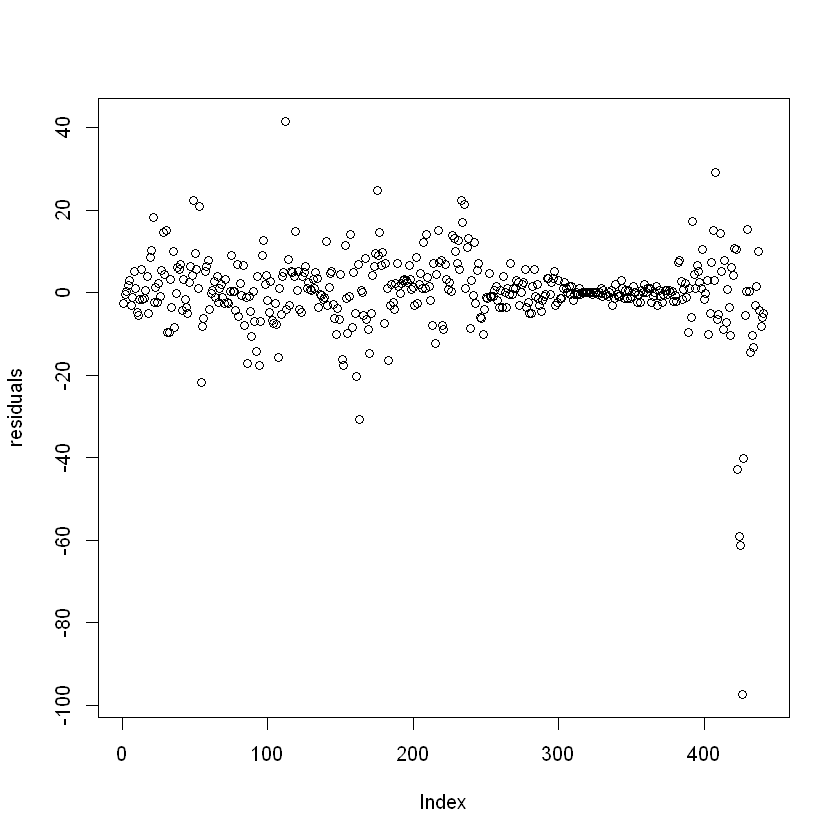

In [106]:
plot(residuals)

Even though we see a huge drop in error at weekends,that is because there are usually **very low demands** at those times therefore the magnitude of our error is also smaller or else we would have a model that does a terrible job at predicting weekend demand.  

A lot of the high error values you see are due to unusual values in the data which will we will look into later.  

Keeping these points in mind, we would say that the residuals are pretty **random** and our model captures the underlying structure of the data a decent amount.For this reason we decided not to model the residuals in an attempt to improve forecasts.

## R squared on training set

In [64]:
#ON TRAIN
actual.demand<-training.set$demand
predicted.demand<-mymodel[1:882]

residuals<-actual.demand-predicted.demand

#Adjusted R-Squared
n=length(actual.demand)
k=251-1 #Subtract one to ignore intercept
SSE=sum(residuals**2)
SSyy=sum((actual.demand-mean(actual.demand))**2)
1-(SSE/SSyy)*(n-1)/(n-(k+1))

[1] 0.9262423

## MAPE and MAE on training set

In [334]:
comparison.train<-data.frame(comparisondata[1:882,],
        abs((comparisondata$demand-comparisondata$predicted)/comparisondata$demand*100)[1:882],
        abs(comparisondata$demand-comparisondata$predicted)[1:882])

colnames(comparison.train)<-c(colnames(comparison.train)[1:6],'APE','AE')

head(comparison.train)

date.and.time,demand,predicted,residual,daytype,season,APE,AE
2005-03-01 06:30:00,1,2.70,-1.70,weekday,1,170.000000,1.70
2005-03-01 06:45:00,2,2.35,-0.35,weekday,2,17.500000,0.35
2005-03-01 07:00:00,4,3.80,0.20,weekday,3,5.000000,0.20
2005-03-01 07:15:00,0,5.30,-5.30,weekday,4,Inf,5.30
2005-03-01 07:30:00,10,10.10,-0.10,weekday,5,1.000000,0.10
2005-03-01 07:45:00,13,14.15,-1.15,weekday,6,8.846154,1.15


In [337]:
comparison.train$APE[comparison.train$demand==0]<- abs(comparison.train$predicted[comparison.train$demand==0])/0.5*100
head(comparison.train)

date.and.time,demand,predicted,residual,daytype,season,APE,AE
2005-03-01 06:30:00,1,2.70,-1.70,weekday,1,170.000000,1.70
2005-03-01 06:45:00,2,2.35,-0.35,weekday,2,17.500000,0.35
2005-03-01 07:00:00,4,3.80,0.20,weekday,3,5.000000,0.20
2005-03-01 07:15:00,0,5.30,-5.30,weekday,4,1060.000000,5.30
2005-03-01 07:30:00,10,10.10,-0.10,weekday,5,1.000000,0.10
2005-03-01 07:45:00,13,14.15,-1.15,weekday,6,8.846154,1.15


In [341]:
MAPE<-mean(comparison.train$APE)
cat('MAPE=',MAPE,'\n')
MAE=mean(comparison.train$AE)
cat('MAE=',MAE)

MAPE= 28.78603 
MAE= 3.474441

# Why we didn't include a trend component

In [361]:
#MEAN OF DEMANDS OVER THE 3 WEEKS

#without weekends and mondays---------------most fair
#first week
cat('Mean demand of first week : ',mean(newdata$demand[1:(63*4)]))
#2nd week without monday to make it fair
cat('\nMean demand of second week : ',mean(newdata$demand[((63*7)+1):(63*11)]))
#3rd week without monday to make it fair
cat('\nMean demand of second week : ',mean(newdata$demand[((63*14)+1):(63*18)]))

Mean demand of first week :  33.56746
Mean demand of second week :  34.04762
Mean demand of second week :  35.33333

We see very small increases in average demand over the weeks.  
Keeping in mind that we had only the data of the first two weeks to fit our model into,an increase of **1 percent** didn't seem significant enough and **it could as well be random**.

# Unusual values in the data

As we mentioned earlier we have some unusual observations in the data set,that **we can't account for** and they decrease the performance metrics of our model for no good reason (especially MAPE).  

There are instances where demand is **zero at classic high demand times** which is probably due to external factors that we can't predict and include in our model.We also see a few **unusual peaks** of demand where our model under estimated and those are probably due to special events/occasions when people flood to public transportation.

In [258]:
comparisondata<-data.frame(newdata$date.and.time,newdata$demand,mymodel,newdata$demand-mymodel,newdata$daytype,newdata$myseason)
colnames(comparisondata)<-c('date.and.time','demand','predicted','residual','daytype','season')
                   

In [230]:
with( comparisondata , comparisondata[ abs(residual) >= 20 & abs(residual) <30  &!is.na(residual), ] )

,date.and.time,demand,predicted,residual,daytype,season
48,2005-03-01 18:15:00,62,87.80,-25.80,weekday,48
55,2005-03-01 20:00:00,79,58.15,20.85,weekday,55
179,2005-03-03 19:30:00,81,54.35,26.65,weekday,53
234,2005-03-04 17:30:00,67,46.10,20.90,weekday,45
428,2005-03-07 18:45:00,136,113.60,22.40,weekday,50
931,2005-03-15 18:30:00,115,92.80,22.20,weekday,49
935,2005-03-15 19:30:00,88,67.25,20.75,weekday,53
936,2005-03-15 19:45:00,43,64.80,-21.80,weekday,54
1043,2005-03-17 15:00:00,13,33.20,-20.20,weekday,35
1057,2005-03-17 18:30:00,93,68.20,24.80,weekday,49


In [231]:
with( comparisondata , comparisondata[ abs(residual) >= 30 & abs(residual) <40  &!is.na(residual), ] )

,date.and.time,demand,predicted,residual,daytype,season
49,2005-03-01 18:30:00,62,92.80,-30.80,weekday,49
50,2005-03-01 18:45:00,69,100.40,-31.40,weekday,50
1045,2005-03-17 15:30:00,0,30.85,-30.85,weekday,37


In [232]:
with( comparisondata , comparisondata[ abs(residual) >= 40   &!is.na(residual), ] )

,date.and.time,demand,predicted,residual,daytype,season
994,2005-03-16 18:30:00,122,80.5,41.5,weekday,49
1305,2005-03-21 17:30:00,3,45.9,-42.9,weekday,45
1306,2005-03-21 17:45:00,0,59.0,-59.0,weekday,46
1307,2005-03-21 18:00:00,0,61.2,-61.2,weekday,47
1308,2005-03-21 18:15:00,0,97.4,-97.4,weekday,48
1309,2005-03-21 18:30:00,65,105.1,-40.1,weekday,49


In [257]:
#significant errors
#get percentage of predictions with error between some values
number_of_errors<-dim(with( comparisondata , comparisondata[ demand < 40 & abs(residual) >10 & abs(residual) <20  &!is.na(residual), ] ))[1]
percentage<-number_of_errors/1323*100
percentage




[1] 3.174603

In [252]:
with( comparisondata , comparisondata[ demand <= 5 & abs(residual) > 3 &  daytype=='weekday'   &!is.na(residual), ] )

,date.and.time,demand,predicted,residual,daytype,season
4,2005-03-01 07:15:00,0,5.300000,-5.300000,weekday,4
198,2005-03-04 08:30:00,5,12.900000,-7.900000,weekday,9
1045,2005-03-17 15:30:00,0,30.850000,-30.850000,weekday,37
1305,2005-03-21 17:30:00,3,45.900000,-42.900000,weekday,45
1306,2005-03-21 17:45:00,0,59.000000,-59.000000,weekday,46
1307,2005-03-21 18:00:00,0,61.200000,-61.200000,weekday,47
1308,2005-03-21 18:15:00,0,97.400000,-97.400000,weekday,48
1323,2005-03-21 22:00:00,2,7.128571,-5.128571,weekday,63


# Fitting model to entire period to produce forecasts

In [19]:
#dataframe used to represent our model.The columns are the variables.
model.data<-data.frame(seasonal_data$demand, seasonal_data$dtype, day_column, seasonal_data[6:67]
,seasonal_data$dtype*seasonal_data[6:67], day_column*seasonal_data[6:67]
,seasonal_data$dtype*day_column*seasonal_data[6:67])

colnames(model.data)<-c('demand','daytype','daynumber',colnames(model.data)[4:65],
                        paste(colnames(model.data)[4:65],'.dtype',sep = ''),
                        paste(colnames(model.data)[4:65],'.day',sep = ''),
                        paste(colnames(model.data)[4:65],'.day.dtype',sep = ''))

trainingdata<-model.data[1:1323,]


head(model.data)
dim(model.data)
names(model.data)

demand,daytype,daynumber,S1,S2,S3,S4,S5,S6,S7,...,S53.day.dtype,S54.day.dtype,S55.day.dtype,S56.day.dtype,S57.day.dtype,S58.day.dtype,S59.day.dtype,S60.day.dtype,S61.day.dtype,S62.day.dtype
1,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


[1] 1512  251

[1] "demand"        "daytype"       "daynumber"     "S1"           
  [5] "S2"            "S3"            "S4"            "S5"           
  [9] "S6"            "S7"            "S8"            "S9"           
 [13] "S10"           "S11"           "S12"           "S13"          
 [17] "S14"           "S15"           "S16"           "S17"          
 [21] "S18"           "S19"           "S20"           "S21"          
 [25] "S22"           "S23"           "S24"           "S25"          
 [29] "S26"           "S27"           "S28"           "S29"          
 [33] "S30"           "S31"           "S32"           "S33"          
 [37] "S34"           "S35"           "S36"           "S37"          
 [41] "S38"           "S39"           "S40"           "S41"          
 [45] "S42"           "S43"           "S44"           "S45"          
 [49] "S46"           "S47"           "S48"           "S49"          
 [53] "S50"           "S51"           "S52"           "S53"          
 [57] "S54"           "S55"           "S56"           "S57"          
 [61] "S58"           "S59"           "S60"           "S61"          
 [65] "S62"           "S1.dtype"      "S2.dtype"      "S3.dtype"     
 [69] "S4.dtype"      "S5.dtype"      "S6.dtype"      "S7.dtype"     
 [73] "S8.dtype"      "S9.dtype"      "S10.dtype"     "S11.dtype"    
 [77] "S12.dtype"     "S13.dtype"     "S14.dtype"     "S15.dtype"    
 [81] "S16.dtype"     "S17.dtype"     "S18.dtype"     "S19.dtype"    
 [85] "S20.dtype"     "S21.dtype"     "S22.dtype"     "S23.dtype"    
 [89] "S24.dtype"     "S25.dtype"     "S26.dtype"     "S27.dtype"    
 [93] "S28.dtype"     "S29.dtype"     "S30.dtype"     "S31.dtype"    
 [97] "S32.dtype"     "S33.dtype"     "S34.dtype"     "S35.dtype"    
[101] "S36.dtype"     "S37.dtype"     "S38.dtype"     "S39.dtype"    
[105] "S40.dtype"     "S41.dtype"     "S42.dtype"     "S43.dtype"    
[109] "S44.dtype"     "S45.dtype"     "S46.dtype"     "S47.dtype"    
[113] "S48.dtype"     "S49.dtype"     "S50.dtype"     "S51.dtype"    
[117] "S52.dtype"     "S53.dtype"     "S54.dtype"     "S55.dtype"    
[121] "S56.dtype"     "S57.dtype"     "S58.dtype"     "S59.dtype"    
[125] "S60.dtype"     "S61.dtype"     "S62.dtype"     "S1.day"       
[129] "S2.day"        "S3.day"        "S4.day"        "S5.day"       
[133] "S6.day"        "S7.day"        "S8.day"        "S9.day"       
[137] "S10.day"       "S11.day"       "S12.day"       "S13.day"      
[141] "S14.day"       "S15.day"       "S16.day"       "S17.day"      
[145] "S18.day"       "S19.day"       "S20.day"       "S21.day"      
[149] "S22.day"       "S23.day"       "S24.day"       "S25.day"      
[153] "S26.day"       "S27.day"       "S28.day"       "S29.day"      
[157] "S30.day"       "S31.day"       "S32.day"       "S33.day"      
[161] "S34.day"       "S35.day"       "S36.day"       "S37.day"      
[165] "S38.day"       "S39.day"       "S40.day"       "S41.day"      
[169] "S42.day"       "S43.day"       "S44.day"       "S45.day"      
[173] "S46.day"       "S47.day"       "S48.day"       "S49.day"      
[177] "S50.day"       "S51.day"       "S52.day"       "S53.day"      
[181] "S54.day"       "S55.day"       "S56.day"       "S57.day"      
[185] "S58.day"       "S59.day"       "S60.day"       "S61.day"      
[189] "S62.day"       "S1.day.dtype"  "S2.day.dtype"  "S3.day.dtype" 
[193] "S4.day.dtype"  "S5.day.dtype"  "S6.day.dtype"  "S7.day.dtype" 
[197] "S8.day.dtype"  "S9.day.dtype"  "S10.day.dtype" "S11.day.dtype"
[201] "S12.day.dtype" "S13.day.dtype" "S14.day.dtype" "S15.day.dtype"
[205] "S16.day.dtype" "S17.day.dtype" "S18.day.dtype" "S19.day.dtype"
[209] "S20.day.dtype" "S21.day.dtype" "S22.day.dtype" "S23.day.dtype"
[213] "S24.day.dtype" "S25.day.dtype" "S26.day.dtype" "S27.day.dtype"
[217] "S28.day.dtype" "S29.day.dtype" "S30.day.dtype" "S31.day.dtype"
[221] "S32.day.dtype" "S33.day.dtype" "S34.day.dtype" "S35.day.dtype"
[225] "S36.day.dtype" "S37.day.dtype" "S38.day.dtype" "S39.day.dtype"
[229] "S40.d

In [20]:
model<-lm(demand~.,trainingdata)

summary(model)


Call:
lm(formula = demand ~ ., data = trainingdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.067  -2.400   0.000   2.315  37.400 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    10.02063    3.66694   2.733 0.006385 ** 
daytype        -3.47778    2.94439  -1.181 0.237803    
daynumber       0.06349    1.33014   0.048 0.961938    
S1             -9.10397   21.31180  -0.427 0.669334    
S2             -7.80397   21.31180  -0.366 0.714303    
S3            -10.75397   21.31180  -0.505 0.613942    
S4             -0.35397   21.31180  -0.017 0.986752    
S5              1.67937   21.31180   0.079 0.937207    
S6             12.26270   21.31180   0.575 0.565145    
S7             16.06270   21.31180   0.754 0.451195    
S8             16.64603   21.31180   0.781 0.434933    
S9             10.91270   21.31180   0.512 0.608722    
S10             8.71270   21.31180   0.409 0.682753    
S11             6.37937   21.31180   0.299 0.764743   

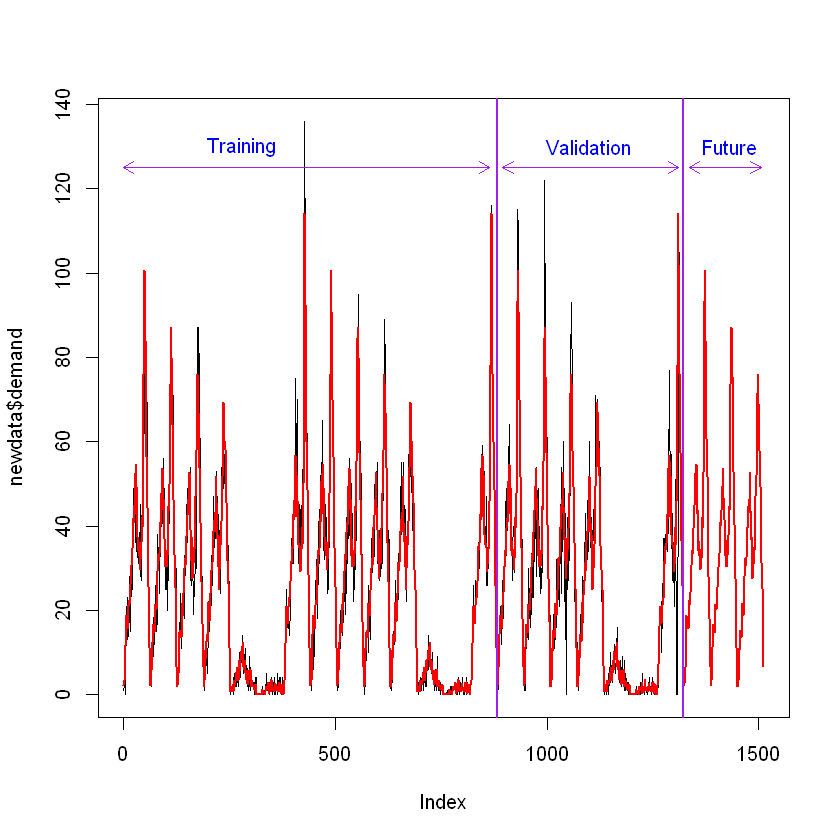

In [86]:
#We create a new dataframe to make the model calculation easier below
ones<-rep(1,1512)
#we remove the demand column since thats what we predict and we replace it with ones
#so they are multiplied by the intercept coefficient
final.model.data<-data.frame(ones,model.data[,-1])


#coefficients(model)
coef<-coefficients(model)

mymodel = rowSums(mapply("*", as.data.frame(final.model.data),coef))

plot(newdata$demand,type='l',lwd=1,col='black')
lines(mymodel,lwd = 2,col='red')


lines(c(882, 882), c(-20, 200),col='purple',lwd=2)
lines(c(1323, 1323), c(-20, 200),col='purple',lwd=2)
text(280, 130, "Training",col='blue')
text(1100, 130, "Validation",col='blue')
text(1430, 130, "Future",col='blue')
arrows(0 , 125, 865, 125, code = 3, length = 0.1, lwd = 1,angle = 30,col='purple')
arrows(895, 125, 1310, 125, code = 3, length = 0.1, lwd = 1,angle = 30,col='purple')
arrows(1335, 125, 1505, 125, code = 3, length = 0.1, lwd = 1, angle = 30,col='purple')

In [24]:
#write predictions to future set
future.set$demand<-round(mymodel[1324:1512])
head(future.set[1:2],20)

,date.and.time,demand
1324,2005-03-22 06:30:00,2
1325,2005-03-22 06:45:00,3
1326,2005-03-22 07:00:00,3
1327,2005-03-22 07:15:00,7
1328,2005-03-22 07:30:00,12
1329,2005-03-22 07:45:00,14
1330,2005-03-22 08:00:00,19
1331,2005-03-22 08:15:00,17
1332,2005-03-22 08:30:00,18
1333,2005-03-22 08:45:00,16
